## Analizying Data

In [83]:
import pandas as pd

### Dataset

In [84]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


## Quality Assurance (QA) Data

### Duplicated Items

In [85]:
vehicles.shape

(38436, 11)

In [86]:
## Create a new Column in order to see the repeta make and model
vehicles["only_model"] = vehicles.make.str.cat([vehicles.model,vehicles.year.apply(str)],sep=".")

In [87]:
vehicles.only_model.value_counts()

Jeep.Cherokee/Wagoneer.1985                     24
Chevrolet.C10 Pickup 2WD.1984                   19
Ford.F150 Pickup 2WD.1984                       19
GMC.C15 Pickup 2WD.1984                         19
Chevrolet.S10 Pickup 2WD.1984                   18
GMC.S15 Pickup 2WD.1984                         18
Chevrolet.C10 Pickup 2WD.1985                   18
GMC.C15 Pickup 2WD.1985                         18
Ford.Ranger Pickup 2WD.1984                     17
Mitsubishi.Truck 2WD.1984                       17
Chevrolet.C10 Pickup 2WD.1986                   17
GMC.C15 Pickup 2WD.1986                         17
Dodge.Ram 50 Pickup 2WD.1984                    17
Mercury.Lynx.1984                               16
GMC.Vandura G15/25 2WD.1984                     16
Volkswagen.Rabbit.1984                          16
Ford.Escort.1984                                16
Chevrolet.G10/20 Van 2WD.1984                   16
Ford.F150 Pickup 2WD.1985                       16
Ford.Escort.1985               

In [88]:
## Search duplicated and drop then
vehicles[vehicles.duplicated()].shape

(1506, 12)

In [89]:
vehicles = vehicles.drop_duplicates()

In [90]:
vehicles.shape

(36930, 12)

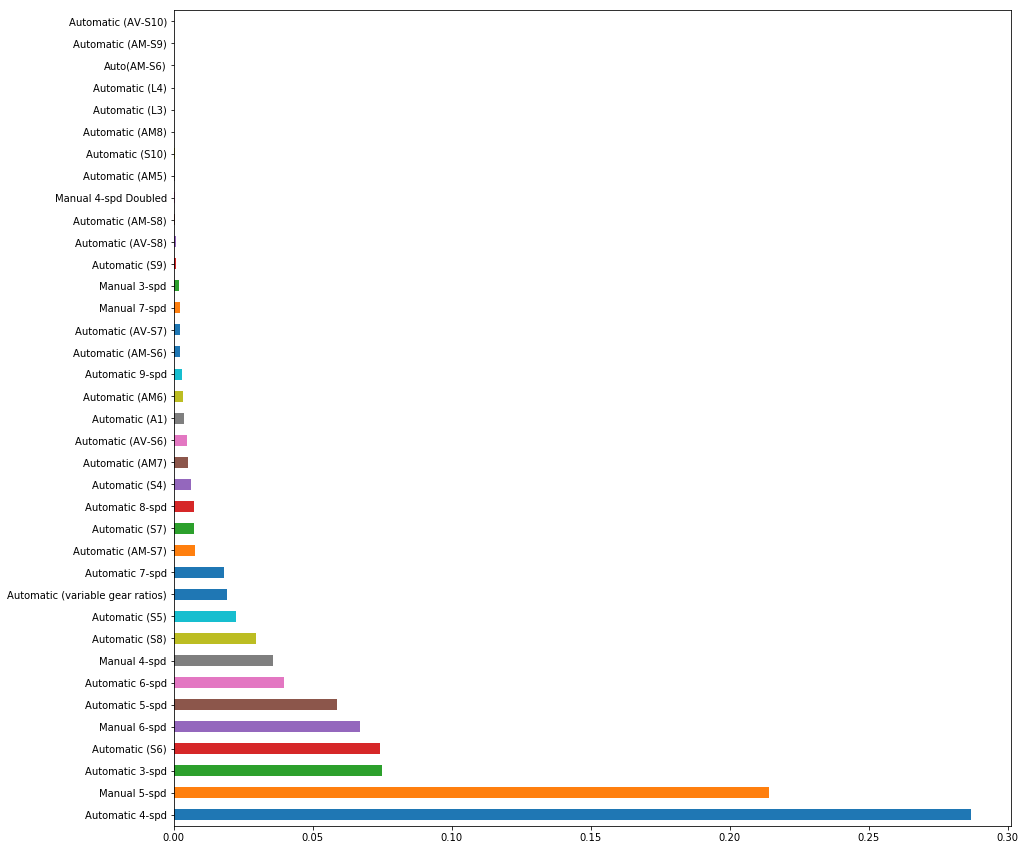

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
vehicles.trany.value_counts(normalize=True).plot.barh()

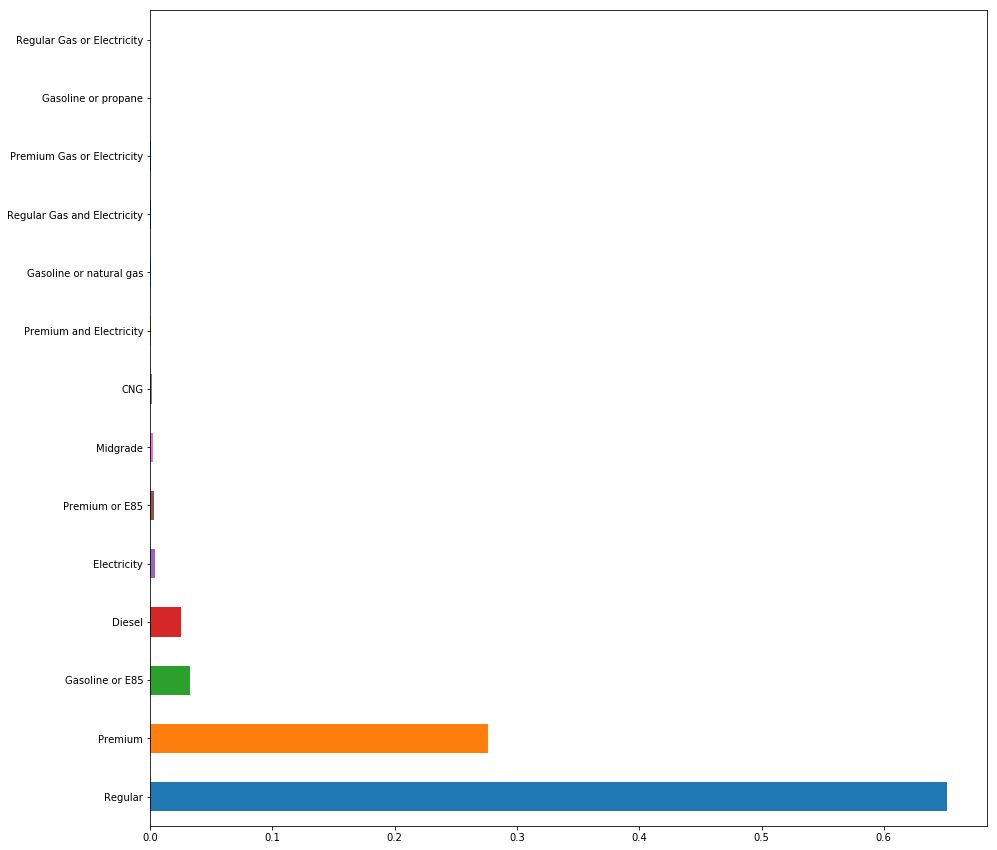

In [92]:
vehicles.fuelType.value_counts(normalize=True).plot.barh()

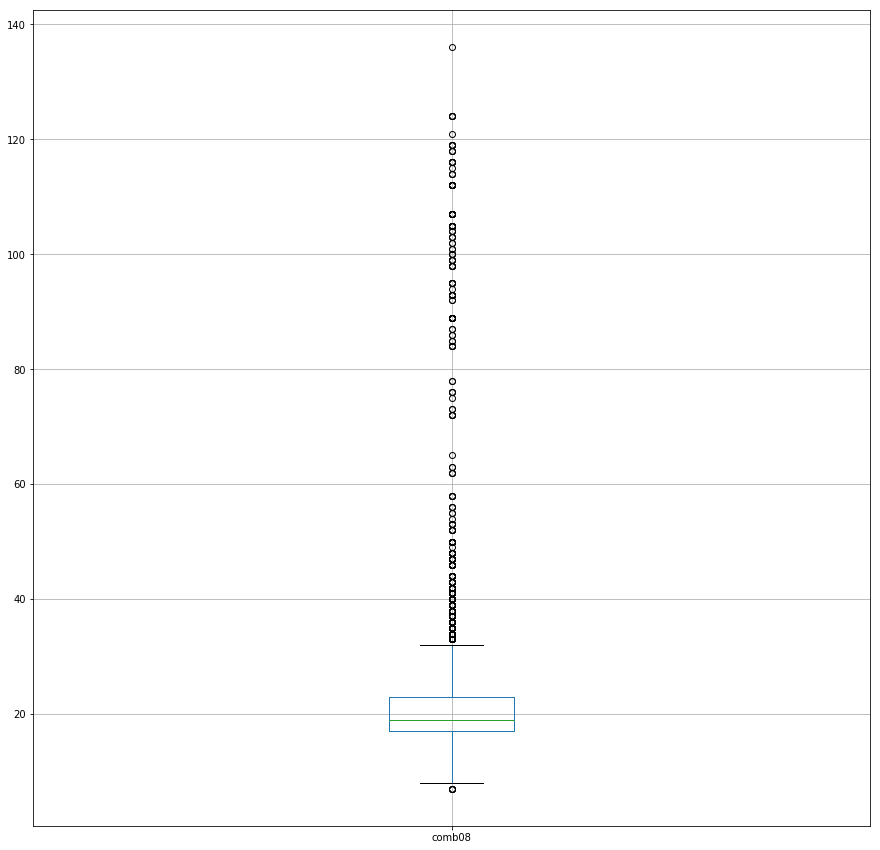

In [93]:
vehicles.boxplot(column="comb08")

In [94]:
#After cleaning csv , we can export it
vehicles.to_csv("vehicles_QA.csv",index=False)

In [95]:
vehicles = pd.read_csv("vehicles_QA.csv")
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(vehicles)

make | 133 | object
model | 3791 | object
year | 35 | int64
displ | 67 | float64
cylinders | 10 | float64
trany | 38 | object
drive | 8 | object
VClass | 34 | object
fuelType | 14 | object
comb08 | 84 | int64
co2TailpipeGpm | 597 | float64
only_model | 17448 | object


### Group Variables

#### Type

In [96]:
vehicles.VClass.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [97]:
little_Vehicle = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
meidum_Vehicle = ['Midsize Cars']
big_Vehicle = ['Large Cars']

vehicles.loc[vehicles['VClass'].isin(little_Vehicle), 
             'clase_type'] = 'Little Vehicles'

vehicles.loc[vehicles['VClass'].isin(meidum_Vehicle), 
             'clase_type'] = 'Medium Vehicles'

vehicles.loc[vehicles['VClass'].isin(big_Vehicle), 
             'clase_type'] = 'Big Vehicles'

vehicles.loc[vehicles['VClass'].str.contains('Truck'), 
             'clase_type'] = 'Trucks'

vehicles.loc[vehicles['VClass'].str.contains('Special Purpose'), 
             'clase_type'] = 'Special Vehicle'

vehicles.loc[vehicles['VClass'].str.contains('Sport Utility'), 
             'clase_type'] = 'Sport Vehicles'

vehicles.loc[vehicles['VClass'].str.contains('Station'), 
             'clase_type'] = 'Family Vehicles'

vehicles.loc[(vehicles['VClass'].str.lower().str.contains('van')),
             'clase_type'] = 'Vans'
vehicles.clase_type = vehicles.clase_type.astype("category")
vehicles.clase_type.value_counts()

Little Vehicles    13055
Trucks              5446
Sport Vehicles      5313
Medium Vehicles     4274
Family Vehicles     2540
Special Vehicle     2216
Vans                2213
Big Vehicles        1873
Name: clase_type, dtype: int64

#### Train

In [98]:
vehicles.trany.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

In [99]:
vehicles['trany_type'] = "Automatica"
vehicles['trany_type'][
    (vehicles['trany'].notnull()) & (vehicles['trany'].str.startswith('M'))
] = "Manual"

C:\Users\Manu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [100]:
vehicles.trany_type = vehicles.trany_type.astype("category")

In [101]:
vehicles.trany_type.value_counts()

Automatica    25076
Manual        11854
Name: trany_type, dtype: int64

#### Fuel

In [102]:
vehicles.fuelType.value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Electricity                      139
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: fuelType, dtype: int64

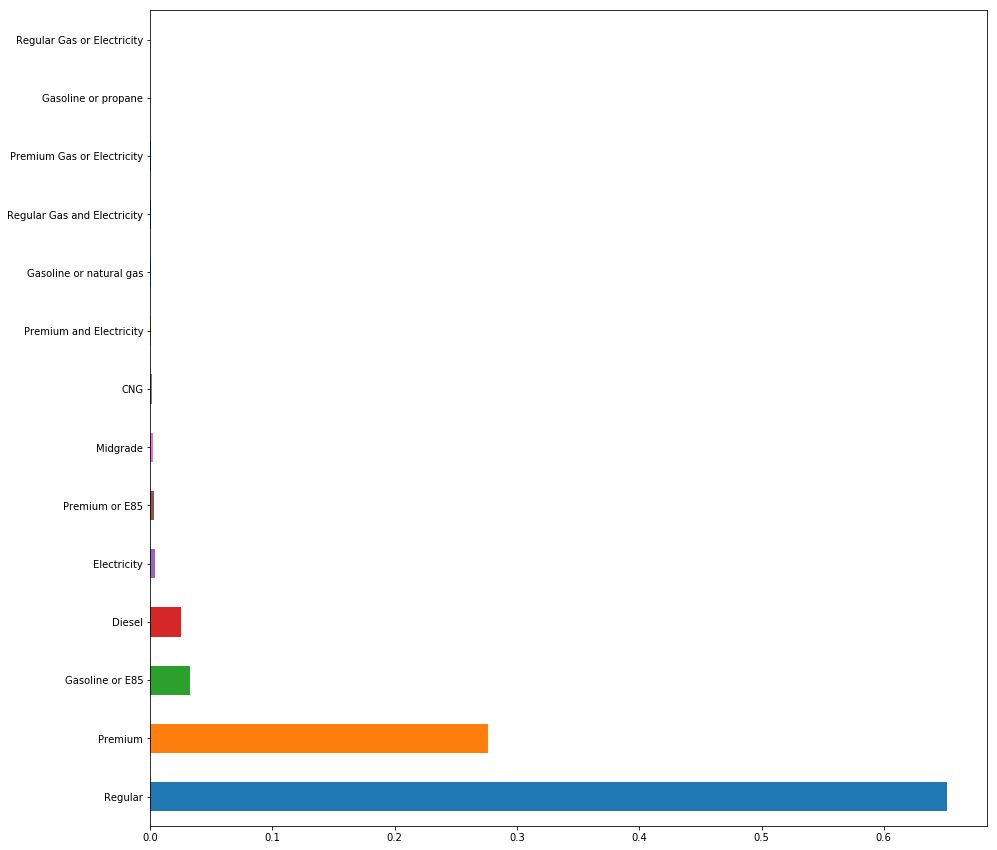

In [103]:
vehicles.fuelType.value_counts(normalize=True).plot.barh()

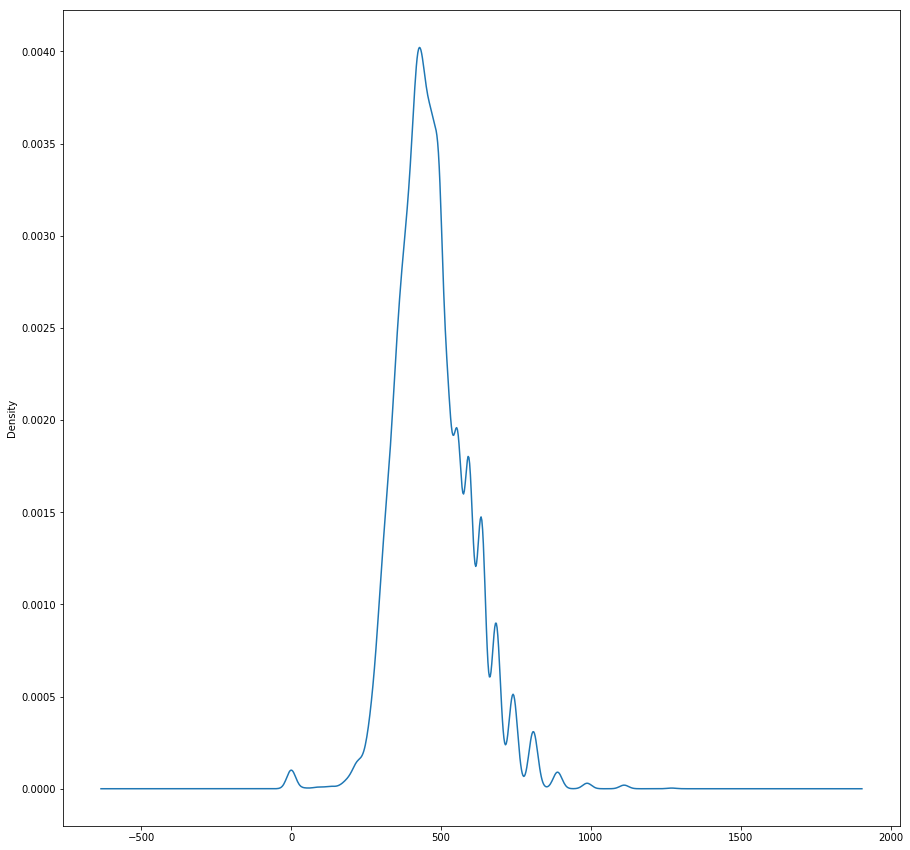

In [104]:
vehicles["co2TailpipeGpm"].plot.kde()

In [106]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel('Distribution of the variable {}'.format(col))
    plt.show()

In [108]:
column_numerics = vehicles.select_dtypes(['int', 'float']).columns

In [109]:
from ipywidgets import interact, fixed

In [112]:
interact(distribucion_variable_numerica, col=column_numerics, df=fixed(vehicles));

interactive(children=(Dropdown(description='col', options=('displ', 'cylinders', 'co2TailpipeGpm'), value='dis…

In [113]:
from scipy import stats

In [116]:
def normalidad_variable_numerica(col):
    stats.probplot(vehicles[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

In [117]:
interact(normalidad_variable_numerica, col=column_numerics);

interactive(children=(Dropdown(description='col', options=('displ', 'cylinders', 'co2TailpipeGpm'), value='dis…